## Project 1: Application of spatial filters for image denoising, derivatives, and template matching

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from skimage import color
from skimage import io
import seaborn as sns
import math
from scipy import signal
sns.set()

### Box Filter

In [17]:
def create_box_filter(n):
    if(n <= 2):
        n = 3
    elif(n%2 == 0):
        n = n+1 
    
    box_filter=np.ones((n,n))*(1/n**2)
    return box_filter

### Gaussian Filter

In [106]:
def create_gaussian_filter(sigma):
    n= 2*math.floor(3*sigma)+1
    
    if(n <= 2):
        n = 3
    elif(n%2 == 0):
        n = n+1
    
    gaussian_filter=np.zeros((n,n))
    
    rows, cols=gaussian_filter.shape
    
    for r in range(rows):
        for c in range(cols):
            gaussian_filter[r][c]=(1/(math.pi*sigma**2))*math.exp(-(r**2 + c**2)/(2*sigma**2))
    return gaussian_filter

### Median Filtering

In [98]:
def median_filter(image, filter_size):
    if filter_size%2==0:
        filter_size=filter_size+1
    elif filter_size<=2:
        filter_size=3
    temp = []
    indexer = filter_size // 2
    image_out = np.zeros((len(image),len(image[0])))
    for i in range(len(image)):

        for j in range(len(image[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(image) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(image) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(image[i + z - indexer][j + k - indexer])

            temp.sort()
            image_out[i][j] = temp[len(temp) // 2]
            temp = []
    return image_out

### Convolution

In [13]:
def convolution2D(f, I):
    #Assumption that the image is in greyscale
    image_h = I.shape[0]
    image_w = I.shape[1]
    
    filter_size = f.shape[0]
    pw=filter_size//2
    image_pad = np.pad(I, pad_width=((pw, pw),(pw, pw)), mode='constant', constant_values=0).astype(np.float32)
    h = w = filter_size // 2

    image_conv = np.zeros(image_pad.shape)
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+filter_size, j-w:j-w+filter_size]
            x = x.flatten()*f.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]

In [100]:
# Read test image
img=color.rgb2gray(io.imread('lena.png'))
img_array=np.asarray(img)

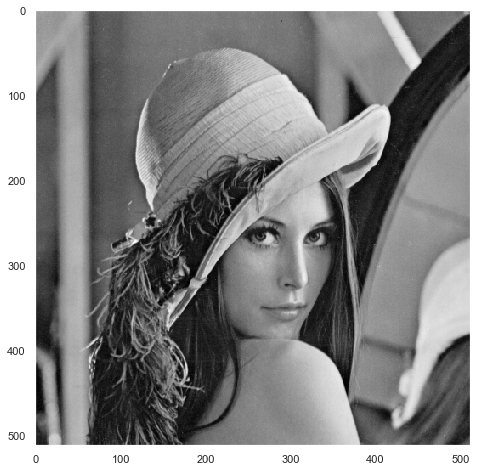

In [101]:
plt.figure(figsize=(16, 8))
plt.imshow(img, cmap='gray')
plt.grid(b=None)

### Box Filter

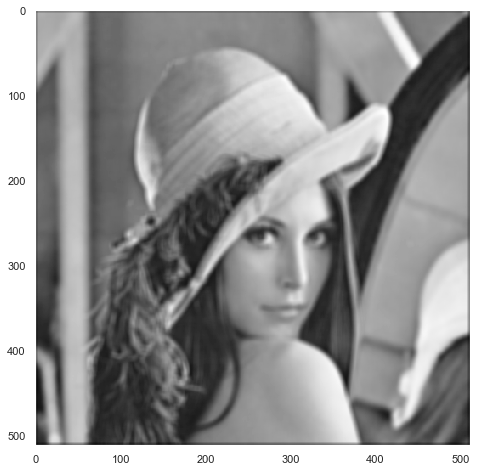

In [104]:
# Box-filter 5*5
box3=create_box_filter(7)
plt.figure(figsize=(16, 8))
plt.imshow(convolution2D(box3, img), cmap='gray')
plt.grid(b=None)

As we notice the image gets blurred, it removes noise by reducing the intensity variance since the new distrbution is closer to the mean.

### Gaussian Filter

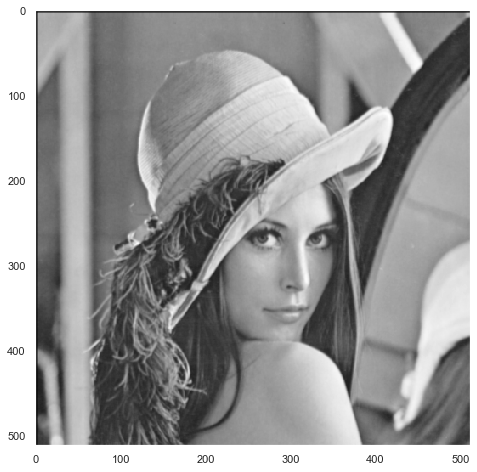

In [107]:
# Gaussian filter 5*5
gaussian5=create_gaussian_filter(1.2)
plt.figure(figsize=(16, 8))
plt.imshow(convolution2D(gaussian5, img), cmap='gray')
plt.grid(b=None)

As we notice the image gets blurred again, again we reduce noise by reducing variance in pixel intensities. But now nearby pixels have a greater influence on blurring depending on the sigma.

### Median Filter

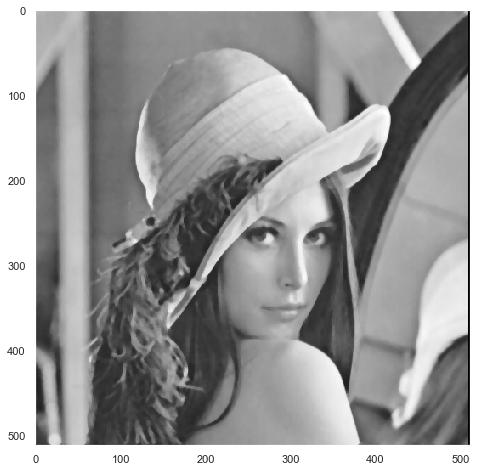

In [108]:
# 5*5 median filter
plt.figure(figsize=(16, 8))
plt.imshow(median_filter(img, 5), cmap='gray')
plt.grid(b=None)

Image gets blurred because the values are shifted towards the median. Thus reducing variance of intensities.

# Filter Comparison : Box Vs Median Vs Guassian

## 1. Low noise

In [172]:
sigma = 12
img_noisy = img + sigma*np.random.randn(*img.shape)

#### Noisy image

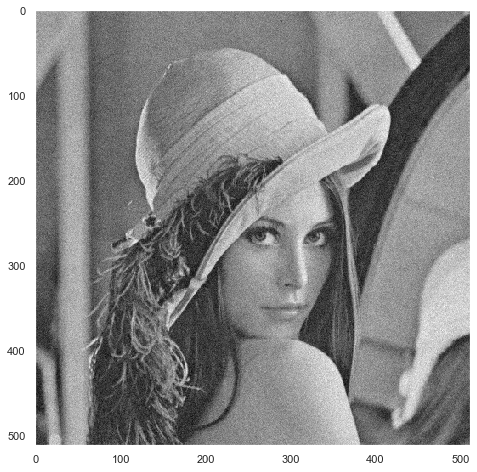

In [173]:
plt.figure(figsize=(16, 8))
plt.imshow(img_noisy, cmap='gray')
plt.grid(b=None)

### Box Filter: Low Noise

Text(0.5, 1.0, '7*7 Box Filter: Low Noise')

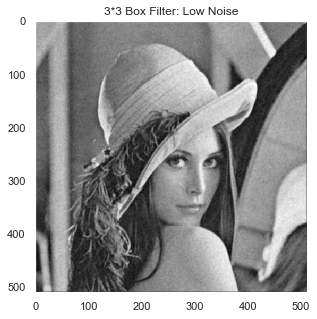

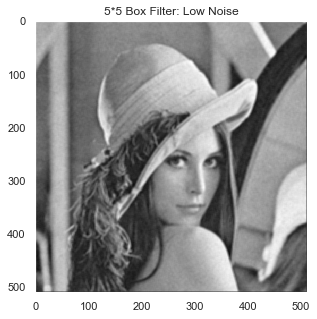

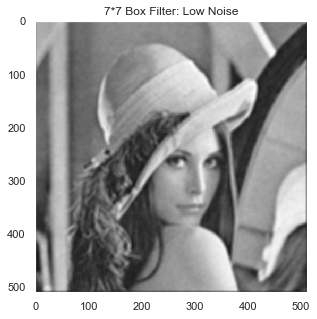

In [174]:
# Visualize the result

# 3*3 box filter
#plt.add_subplot(1,2,1)
box3=create_box_filter(3)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box3, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Box Filter: Low Noise')

# 5*5 box filter
#plt.add_subplot(1,2,2)
box5=create_box_filter(5)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Box Filter: Low Noise')

# 7*7 box filter
box5=create_box_filter(7)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Box Filter: Low Noise')

### Guassian Filter: Low Noise

Text(0.5, 1.0, '7*7 Guassian Filter: Low Noise')

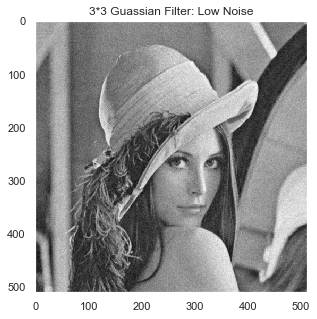

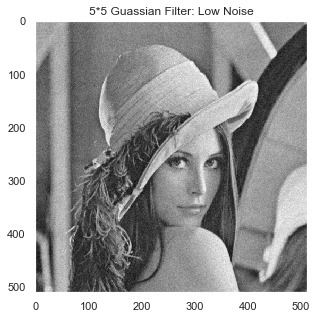

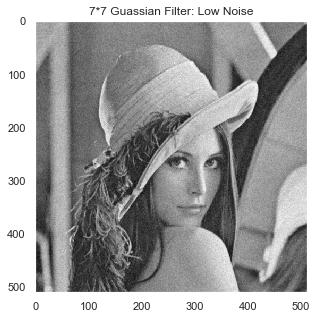

In [175]:
# Visualize the result

# 3*3 guassian filter
gaussian3=create_gaussian_filter(0.2)
# print("#3 shape: ", gaussian3.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Guassian Filter: Low Noise')

# 5*5 guassian filter
gaussian5=create_gaussian_filter(0.7)
# print("#5 shape:", gaussian5.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Guassian Filter: Low Noise')

# 7*7 guassian filter
gaussian7=create_gaussian_filter(1.2)
# print("#7 shape:", gaussian7.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Guassian Filter: Low Noise')

### Median Filter: Low Noise

Text(0.5, 1.0, '7*7 Median Filter: Low Noise')

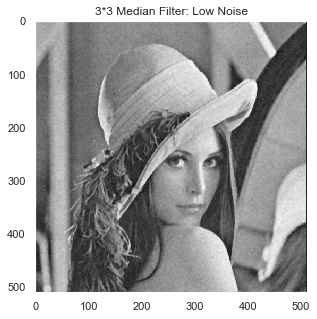

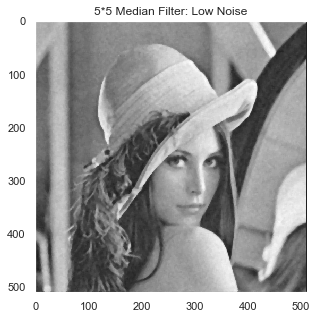

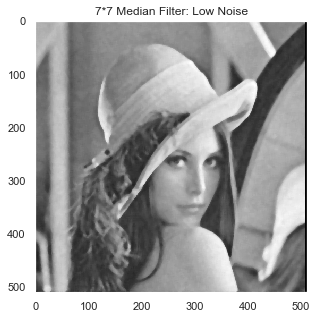

In [176]:
# 3*3 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 3), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Median Filter: Low Noise')

# 5*5 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 5), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Median Filter: Low Noise')

# 7*7 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 7), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Median Filter: Low Noise')

## 2. Medium Noise

In [177]:
sigma = 22
img_noisy = img + sigma*np.random.randn(*img.shape)

### Noisy image

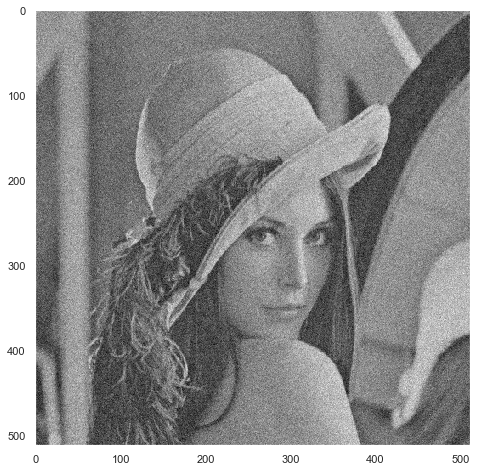

In [178]:
plt.figure(figsize=(16, 8))
plt.imshow(img_noisy, cmap='gray')
plt.grid(b=None)

### Box Filter: Medium Noise

Text(0.5, 1.0, '7*7 Box Filter: Medium Noise')

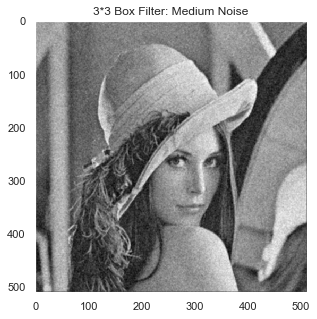

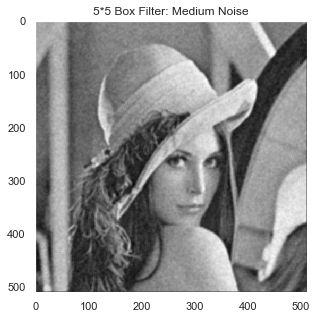

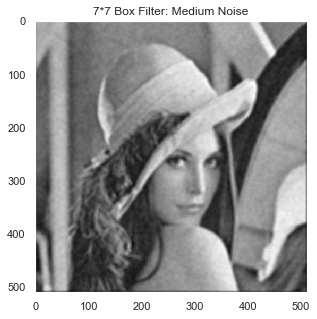

In [179]:
# Visualize the result

# 3*3 box filter
#plt.add_subplot(1,2,1)
box3=create_box_filter(3)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box3, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Box Filter: Medium Noise')

# 5*5 box filter
#plt.add_subplot(1,2,2)
box5=create_box_filter(5)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Box Filter: Medium Noise')

# 7*7 box filter
box5=create_box_filter(7)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Box Filter: Medium Noise')

### Gaussian Filter: Medium Noise

Text(0.5, 1.0, '7*7 Guassian Filter: Medium Noise')

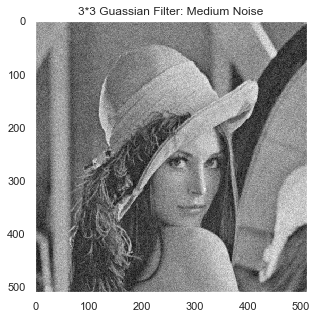

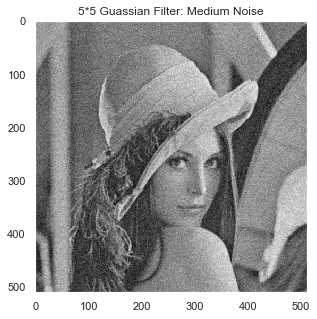

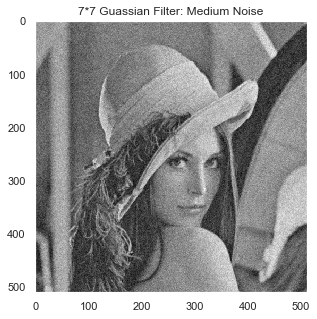

In [180]:
# Visualize the result

# 3*3 guassian filter
gaussian3=create_gaussian_filter(0.2)
# print("#3 shape: ", gaussian3.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Guassian Filter: Medium Noise')

# 5*5 guassian filter
gaussian5=create_gaussian_filter(0.7)
# print("#5 shape:", gaussian5.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Guassian Filter: Medium Noise')

# 7*7 guassian filter
gaussian7=create_gaussian_filter(1.2)
# print("#7 shape:", gaussian7.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Guassian Filter: Medium Noise')

### Median Filter: Medium Noise

Text(0.5, 1.0, '7*7 Median Filter: Medium Noise')

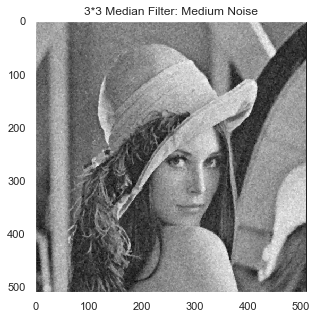

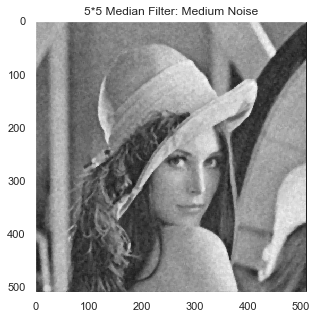

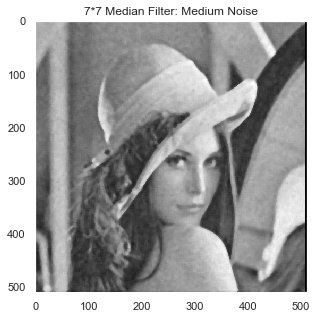

In [181]:
# 3*3 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 3), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Median Filter: Medium Noise')

# 5*5 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 5), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Median Filter: Medium Noise')

# 7*7 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 7), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Median Filter: Medium Noise')

## 3. High Noise

In [182]:
sigma = 32
img_noisy = img + sigma*np.random.randn(*img.shape)

### Noisy image

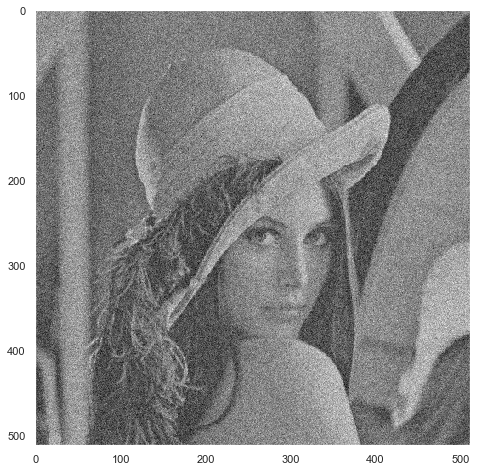

In [183]:
plt.figure(figsize=(16, 8))
plt.imshow(img_noisy, cmap='gray')
plt.grid(b=None)

### Box Filter: High Noise

Text(0.5, 1.0, '7*7 Box Filter: High Noise')

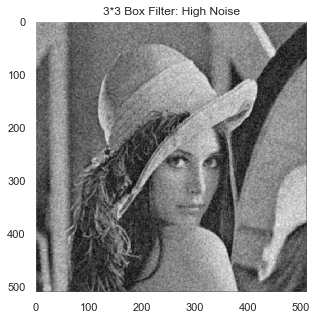

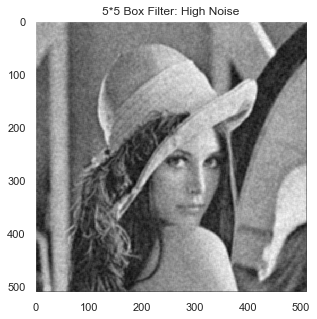

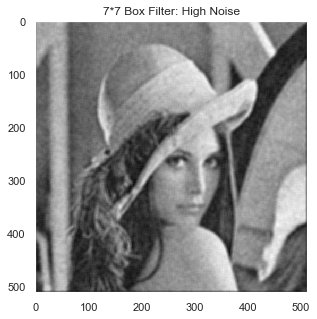

In [184]:
# Visualize the result

# 3*3 box filter
#plt.add_subplot(1,2,1)
box3=create_box_filter(3)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box3, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Box Filter: High Noise')

# 5*5 box filter
#plt.add_subplot(1,2,2)
box5=create_box_filter(5)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Box Filter: High Noise')

# 7*7 box filter
box5=create_box_filter(7)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(box5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Box Filter: High Noise')

### Gaussian Filter: High Noise

Text(0.5, 1.0, '7*7 Guassian Filter: High Noise')

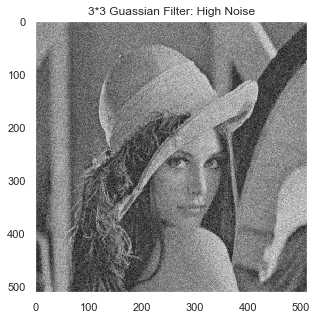

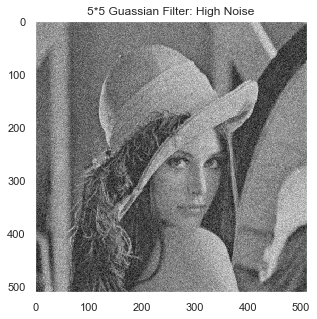

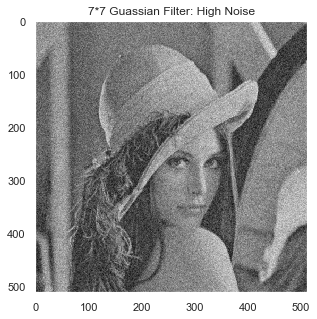

In [185]:
# Visualize the result

# 3*3 guassian filter
gaussian3=create_gaussian_filter(0.2)
# print("#3 shape: ", gaussian3.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Guassian Filter: High Noise')

# 5*5 guassian filter
gaussian5=create_gaussian_filter(0.7)
# print("#5 shape:", gaussian5.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Guassian Filter: High Noise')

# 7*7 guassian filter
gaussian7=create_gaussian_filter(1.2)
# print("#7 shape:", gaussian7.shape)
plt.figure(figsize=(15, 5))
plt.imshow(convolution2D(gaussian5, img_noisy), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Guassian Filter: High Noise')

### Median Filter: High Noise

Text(0.5, 1.0, '7*7 Median Filter: High Noise')

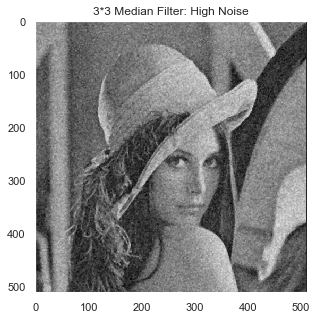

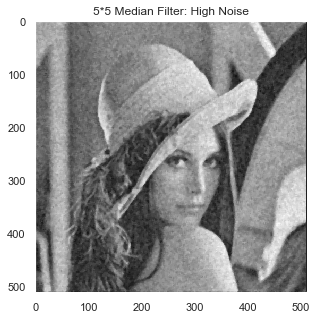

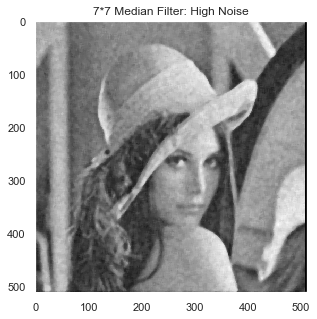

In [187]:
# 3*3 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 3), cmap='gray')
plt.grid(b=None)
plt.title('3*3 Median Filter: High Noise')

# 5*5 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 5), cmap='gray')
plt.grid(b=None)
plt.title('5*5 Median Filter: High Noise')

# 7*7 median filter
plt.figure(figsize=(15, 5))
plt.imshow(median_filter(img_noisy, 7), cmap='gray')
plt.grid(b=None)
plt.title('7*7 Median Filter: High Noise')

### A2) Derivative Filters

In [12]:
# Read test image
img_cam=color.rgb2gray(io.imread('cameraman.png'))
img_cam_arr=np.asarray(img_cam)

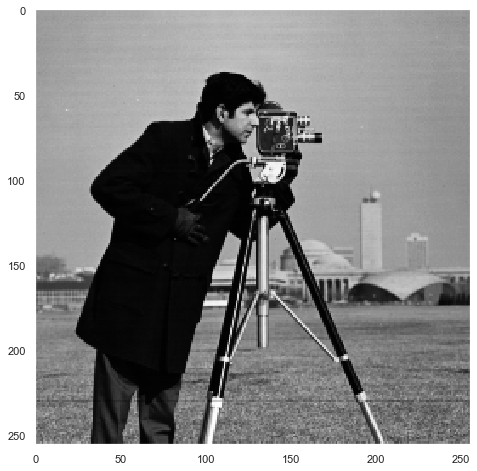

In [14]:
plt.figure(figsize=(16, 8))
plt.imshow(img_cam, cmap='gray')
plt.grid(b=None)

#### Derivative filter w.r.t. x

In [23]:
# Initialize the array with zeroes
derivative_filter_x = np.zeros((3,3))

derivative_filter_x[:, :] = np.array([[[0, 0, 0],
                                   [-1, 0, 1],
                                   [0, 0, 0]]])
derivative_filter_x

array([[ 0.,  0.,  0.],
       [-1.,  0.,  1.],
       [ 0.,  0.,  0.]])

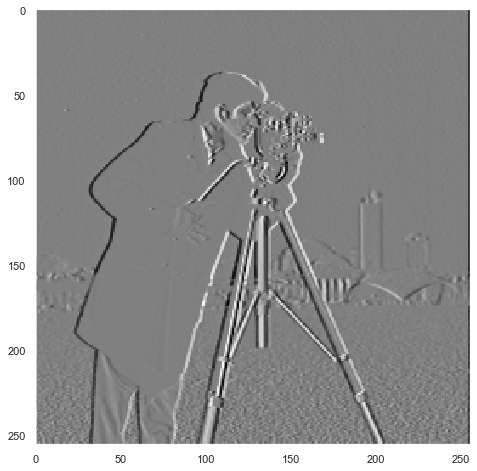

In [24]:
# Derivative filter: X-axis
plt.figure(figsize=(16, 8))
plt.imshow(convolution2D(derivative_filter_x, img_cam), cmap='gray')
plt.grid(b=None)

#### Derivative filter w.r.t. y

In [25]:
# Initialize the array with zeroes
derivative_filter_y = np.zeros((3,3))

derivative_filter_y[:, :] = np.array([[[0, -1, 0],
                                   [0, 0, 0],
                                   [0, 1, 0]]])
derivative_filter_y

array([[ 0., -1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  0.]])

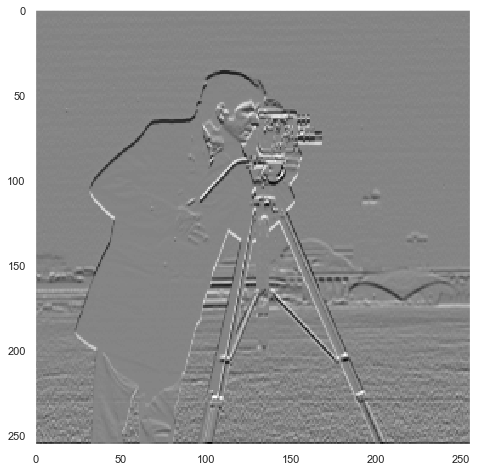

In [26]:
# Derivative filter: Y-axis
plt.figure(figsize=(16, 8))
plt.imshow(convolution2D(derivative_filter_y, img_cam), cmap='gray')
plt.grid(b=None)

#### Create Binary Image

In [28]:
def create_bin_img(I, threshold): 
    I1=I.copy()
    for r in range(I1.shape[0]):
        for c in range(I1.shape[1]):
            if I1[r][c]>=threshold: 
                I1[r][c]=0.0
            else: 
                I1[r][c]=1.0
    return I1

In [31]:
df_x=convolution2D(derivative_filter_x, img_cam) 
df_y=convolution2D(derivative_filter_y, img_cam)

#### Compute Threshold Mean

In [63]:
threshold_mean=img_cam.flatten().mean() 
print("Threshold Mean: ",threshold_mean) 

random_threshold_1=77 
random_threshold_2=85

Threshold Mean:  118.7244873046875


#### Use threshold mean on df_x

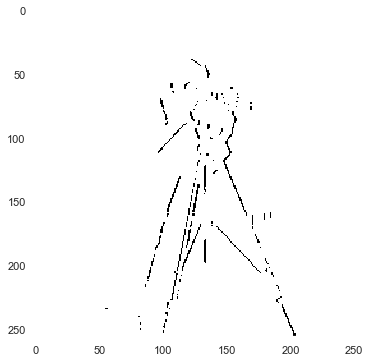

In [38]:
bin_x_mean=create_bin_img(df_x, threshold_mean) 
plt.figure(figsize=(12, 6))
plt.imshow(bin_x_mean, cmap='gray')
plt.grid(b=None)

#### Use random threshold 1 w.r.t. x

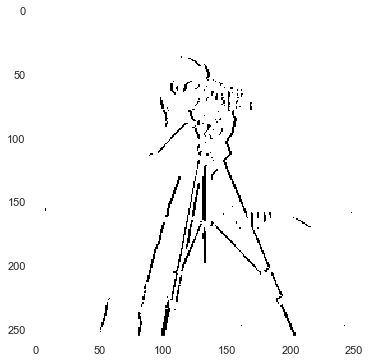

In [39]:
bin_x_1=create_binary_image(df_x, random_threshold_1) 
plt.figure(figsize=(12, 6))
plt.imshow(bin_x_1, cmap='gray')
plt.grid(b=None)

#### Use random threshold 2 w.r.t. x

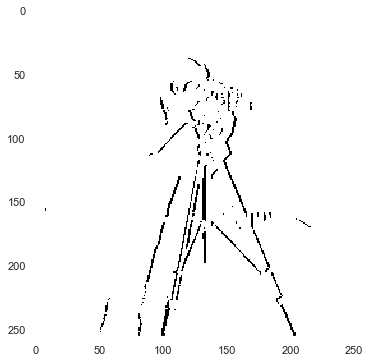

In [42]:
bin_x_2=create_binary_image(df_x, random_threshold_2) 
plt.figure(figsize=(12, 6))
plt.imshow(bin_x_2, cmap='gray')
plt.grid(b=None)

#### Use threshold mean on df_y

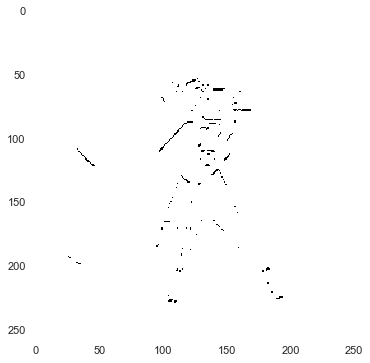

In [44]:
bin_y_mean=create_binary_image(df_y, threshold_mean) 
plt.figure(figsize=(12, 6))
plt.imshow(bin_y_mean, cmap='gray')
plt.grid(b=None)

#### Use random threshold 1 w.r.t. y

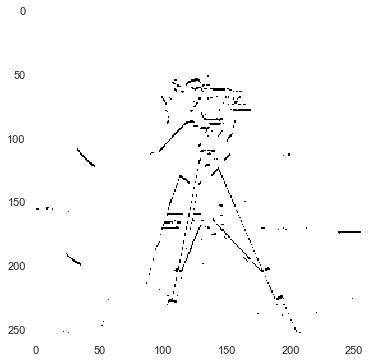

In [45]:
bin_y_1=create_binary_image(df_y, random_threshold_1) 
plt.figure(figsize=(12, 6))
plt.imshow(bin_y_1, cmap='gray')
plt.grid(b=None)

#### Use random threshold 2 w.r.t. y

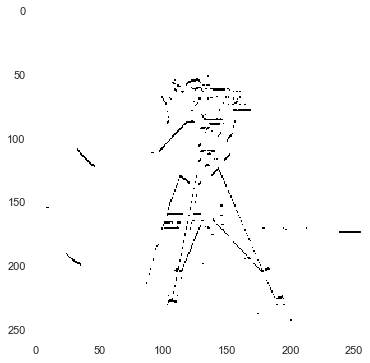

In [46]:
bin_y_2=create_binary_image(df_y, random_threshold_2) 
plt.figure(figsize=(12, 6))
plt.imshow(bin_y_2, cmap='gray')
plt.grid(b=None)

### A3) Template Matching

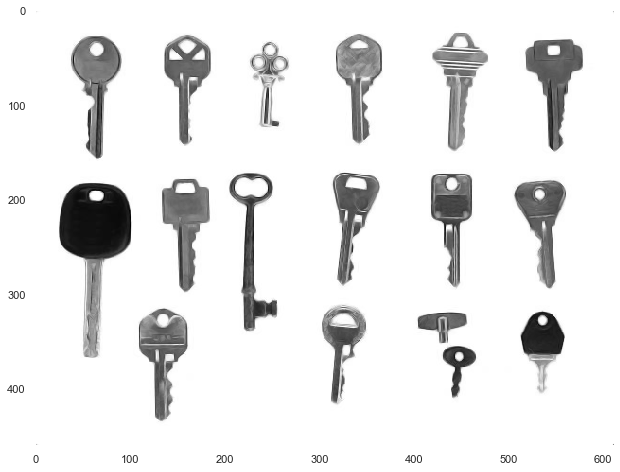

In [48]:
# Visualize the images
plt.figure(figsize=(14,8))
keys_set=color.rgb2gray(io.imread('multiplekeys.png'))
plt.imshow(keys_set, cmap='gray')
plt.grid(b=None)

In [49]:
threshold=keys_set.flatten().mean()

In [50]:
for r in range(keys_set.shape[0]):
    for c in range(keys_set.shape[1]):
        if keys_set[r][c]>=threshold:
            keys_set[r][c]=0.0
        else:
            keys_set[r][c]=1.0

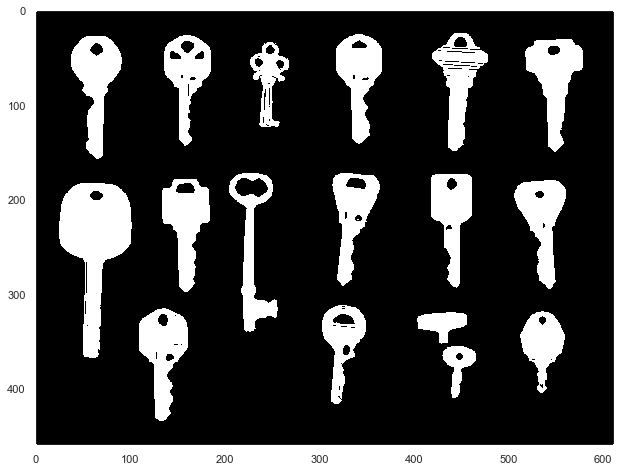

In [51]:
plt.figure(figsize=(16, 8))
plt.imshow(keys_set, cmap='gray')
plt.grid(b=None)

#### Select a key from the 'multiplekeys.png' file

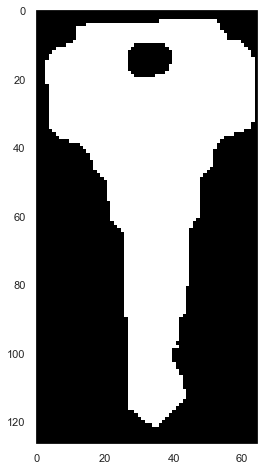

In [52]:
plt.figure(figsize=(16, 8))
plt.imshow(keys_set[28:155, 515: 580], cmap='gray')
plt.grid(b=None)

In [53]:
cropped_img = keys_set[28:155, 515: 580].copy()

In [54]:
print(keys_set)

[[1 1 1 ... 0 1 1]
 [1 1 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]]


In [55]:
print(cropped_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
threshold1=cropped_img.flatten().mean()
print(threshold1)

0.4267716535433071


In [57]:
for r in range(cropped_img.shape[0]):
    for c in range(cropped_img.shape[1]):
        if cropped_img[r][c]>=threshold1:
            cropped_img[r][c]=-1.0
        else:
            cropped_img[r][c]=1.0

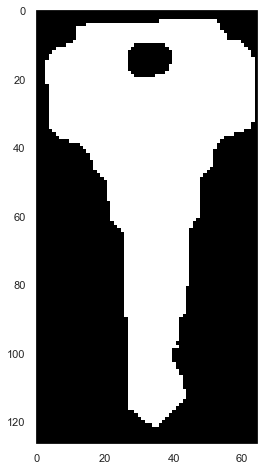

In [58]:
plt.figure(figsize=(16, 8))
plt.imshow(cropped_img, cmap='gray')
plt.grid(b=None)

In [59]:
def template_matching(img, target):
    # initial parameter
    height, width = img.shape
    tar_height, tar_width = target.shape
    (max_Y, max_X) = (0, 0)
    MaxValue = 0

    # Set image, target and result value matrix
    img = np.array(img, dtype="int")
    target = np.array(target, dtype="int")
    NccValue = np.zeros((height-tar_height, width-tar_width))

    # calculate value using filter-kind operation from top-left to bottom-right
    for y in range(0, height-tar_height):
        for x in range(0, width-tar_width):
            # image roi
            roi = img[y : y+tar_height, x : x+tar_width]
            # calculate ncc value
            NccValue[y, x] = np.sum(roi * target)/(np.sqrt( (np.sum(roi ** 2))) * np.sqrt(np.sum(target ** 2)))
            # find the most match area
            if NccValue[y, x] >= MaxValue:
                MaxValue = NccValue[y, x]
                (max_Y, max_X) = (y, x)
    return [NccValue, (max_X, max_Y)]

In [60]:
result=template_matching(keys_set, cropped_img)

/Users/chinmay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


Text(0.2, 0.2, 'peak')

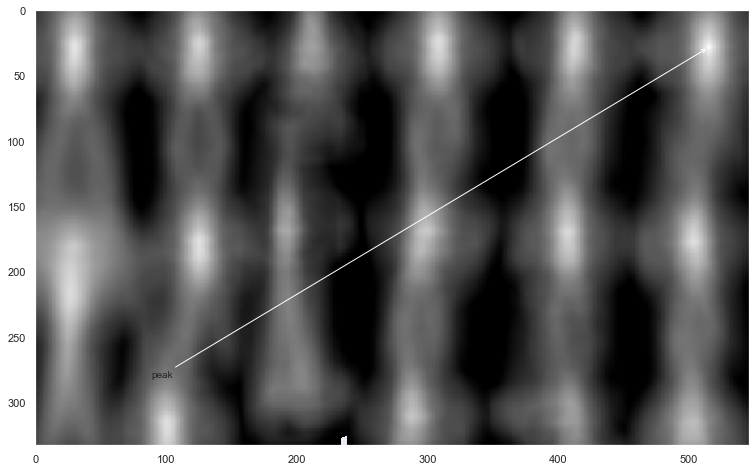

In [61]:
plt.figure(figsize=(16, 8))
plt.imshow(result[0], cmap='gray')
plt.grid(b=None)
plt.annotate('peak', xy=result[1], xycoords='data',
             xytext=(0.2,0.2), textcoords='figure fraction',
             arrowprops=dict(arrowstyle="->"))

In [62]:
print("Peak: ", result[1])

Peak:  (515, 28)
